In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Research Question:** What is the average review score on each of the islands? Do the number of bedrooms have an influence on average review score, and how much does it affect price? Are there any bargains for a certain number of bedrooms? Which islands have the best location scores, and why should one travel to the given island?

In [121]:
df1 = pd.read_csv('http://data.insideairbnb.com/united-states/hi/hawaii/2022-12-15/data/listings.csv.gz')
df1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3002,https://www.airbnb.com/rooms/3002,20221215043812,2022-12-16,city scrape,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",Only renting while I'm gone on vacation or sta...,Waikiki has nice weather 90% percent if the ye...,https://a0.muscache.com/pictures/adf53d15-ab4b...,3364,...,4.87,4.97,4.74,92- 0251181,f,1,0,1,0,1.59
1,5269,https://www.airbnb.com/rooms/5269,20221215043812,2022-12-15,city scrape,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,...,4.87,5.00,4.83,119-269-5808-01R,f,4,4,0,0,0.17
2,5387,https://www.airbnb.com/rooms/5387,20221215043812,2022-12-15,city scrape,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,...,4.87,4.73,4.76,NaN,t,3,3,0,0,1.31
3,5389,https://www.airbnb.com/rooms/5389,20221215043812,2022-12-15,city scrape,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,https://a0.muscache.com/pictures/15520396/3b89...,7878,...,4.85,4.98,4.74,NaN,f,3,3,0,0,0.42
4,5390,https://www.airbnb.com/rooms/5390,20221215043812,2022-12-16,city scrape,STAY AT PRINCE KUHIO!,"<b>The space</b><br />Prince Kuhio, Studio Uni...",NaN,https://a0.muscache.com/pictures/12955/af97ac5...,7887,...,4.78,4.89,4.64,"260050220000, TA-008-490-3424-01",f,1,1,0,0,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30059,781419578563973464,https://www.airbnb.com/rooms/781419578563973464,20221215043812,2022-12-15,city scrape,KAUAI Beach Villas 1 bedroom,Take it easy at this unique and tranquil getaw...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,444732174,...,NaN,NaN,NaN,Exempt,f,82,82,0,0,NaN
30060,781422723319426601,https://www.airbnb.com/rooms/781422723319426601,20221215043812,2022-12-16,city scrape,Ka EO KAI Studio,Take it easy at this unique and tranquil getaw...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,444732174,...,NaN,NaN,NaN,Exempt,f,82,82,0,0,NaN
30061,781430125724465288,https://www.airbnb.com/rooms/781430125724465288,20221215043812,2022-12-16,city scrape,Kona HAWAIIAn two Bedroom,Take it easy at this unique and tranquil getaway.,NaN,https://a0.muscache.com/pictures/12706262-9e5b...,444732174,...,NaN,NaN,NaN,NaN,f,82,82,0,0,NaN
30062,781444449823439299,https://www.airbnb.com/rooms/781444449823439299,20221215043812,2022-12-16,city scrape,Oceanfront Maui (Marriott) Studio,Relax on an oceanfront balcony in a well appoi...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,36908786,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN


In [122]:
df1.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.006400e+04,3.006400e+04,3.006400e+04,30062.000000,30062.000000,30064.000000,30064.000000,30064.000000,0.0,26235.000000,...,23240.000000,23238.000000,23240.000000,23238.000000,23237.000000,30064.000000,30064.000000,30064.000000,30064.000000,23290.000000
mean,1.937206e+17,2.022122e+13,1.450743e+08,173.211962,316.658938,20.903435,-157.191397,4.738026,NaN,1.778235,...,4.750022,4.847838,4.821442,4.867748,4.678967,80.977382,67.186668,13.752495,0.012839,1.241942
std,3.073287e+17,3.906315e-03,1.452389e+08,428.358675,1076.270944,0.805481,1.267125,2.464576,NaN,1.006947,...,0.362264,0.313373,0.346405,0.246300,0.387124,125.440635,105.070240,75.054025,0.229617,1.364240
min,3.002000e+03,2.022122e+13,8.840000e+02,1.000000,1.000000,18.920250,-159.714620,0.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.757391e+07,2.022122e+13,3.074786e+07,3.000000,4.000000,20.691190,-157.837970,3.000000,NaN,1.000000,...,4.670000,4.830000,4.790000,4.830000,4.590000,2.000000,2.000000,0.000000,0.000000,0.300000
50%,4.741853e+07,2.022122e+13,9.700641e+07,26.000000,37.000000,20.961374,-156.690670,4.000000,NaN,2.000000,...,4.860000,4.950000,4.940000,4.930000,4.770000,19.000000,14.000000,0.000000,0.000000,0.780000
75%,5.815161e+17,2.022122e+13,2.260004e+08,184.000000,248.000000,21.288972,-156.436088,6.000000,NaN,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.910000,96.000000,82.000000,0.000000,0.000000,1.780000
max,7.815630e+17,2.022122e+13,4.913647e+08,2577.000000,7435.000000,22.229057,-154.822930,16.000000,NaN,12.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,570.000000,403.000000,534.000000,8.000000,41.800000


In [123]:
df1.describe(include=[np.number])

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.006400e+04,3.006400e+04,3.006400e+04,30062.000000,30062.000000,30064.000000,30064.000000,30064.000000,0.0,26235.000000,...,23240.000000,23238.000000,23240.000000,23238.000000,23237.000000,30064.000000,30064.000000,30064.000000,30064.000000,23290.000000
mean,1.937206e+17,2.022122e+13,1.450743e+08,173.211962,316.658938,20.903435,-157.191397,4.738026,NaN,1.778235,...,4.750022,4.847838,4.821442,4.867748,4.678967,80.977382,67.186668,13.752495,0.012839,1.241942
std,3.073287e+17,3.906315e-03,1.452389e+08,428.358675,1076.270944,0.805481,1.267125,2.464576,NaN,1.006947,...,0.362264,0.313373,0.346405,0.246300,0.387124,125.440635,105.070240,75.054025,0.229617,1.364240
min,3.002000e+03,2.022122e+13,8.840000e+02,1.000000,1.000000,18.920250,-159.714620,0.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.757391e+07,2.022122e+13,3.074786e+07,3.000000,4.000000,20.691190,-157.837970,3.000000,NaN,1.000000,...,4.670000,4.830000,4.790000,4.830000,4.590000,2.000000,2.000000,0.000000,0.000000,0.300000
50%,4.741853e+07,2.022122e+13,9.700641e+07,26.000000,37.000000,20.961374,-156.690670,4.000000,NaN,2.000000,...,4.860000,4.950000,4.940000,4.930000,4.770000,19.000000,14.000000,0.000000,0.000000,0.780000
75%,5.815161e+17,2.022122e+13,2.260004e+08,184.000000,248.000000,21.288972,-156.436088,6.000000,NaN,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.910000,96.000000,82.000000,0.000000,0.000000,1.780000
max,7.815630e+17,2.022122e+13,4.913647e+08,2577.000000,7435.000000,22.229057,-154.822930,16.000000,NaN,12.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,570.000000,403.000000,534.000000,8.000000,41.800000


In [125]:
df1.describe(exclude=[np.number])

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,30064,30064,30064,30064,29917,15967,30064,30064,30062,30062,...,30064,30043,30064,30064,30064,30064,23290,23290,25037,30064
unique,30064,2,2,28584,26521,10152,28772,8308,3768,3478,...,4,41,24073,2238,2,2,3258,1157,18511,2
top,https://www.airbnb.com/rooms/3002,2022-12-15,city scrape,Waikiki Beach Walk Resort - 1 Bed,"Minutes from fashionable shopping, dining and ...",Waikiki Beach - 0.1 miles <br />Waikiki Beach ...,https://a0.muscache.com/pictures/b62ee081-c485...,https://www.airbnb.com/users/show/5615582,Vacasa Hawaii,2013-03-25,...,Entire home/apt,1 bath,"[""Long term stays allowed"", ""Hair dryer"", ""Iro...",$150.00,t,2022-12-15,2021-05-31,2022-11-30,Exempt,t
freq,1,18501,28018,54,105,150,38,570,727,585,...,26272,13950,258,247,29881,18503,47,531,2913,16339


In [126]:
total_listings = len(df1.index)
print(total_listings)

30064


There are 30,064 listings in total, across all the islands. How many of those listings got reviews?

In [127]:
num_listings_with_scores = df1['review_scores_rating'].notnull().sum()
num_listings_with_scores

23290

There are 23,290 listings with reviews, leaving 6,774 listings without review scores.

In [128]:
df_no_nulls = df1.dropna(subset=['review_scores_rating'])
df_no_nulls

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3002,https://www.airbnb.com/rooms/3002,20221215043812,2022-12-16,city scrape,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",Only renting while I'm gone on vacation or sta...,Waikiki has nice weather 90% percent if the ye...,https://a0.muscache.com/pictures/adf53d15-ab4b...,3364,...,4.87,4.97,4.74,92- 0251181,f,1,0,1,0,1.59
1,5269,https://www.airbnb.com/rooms/5269,20221215043812,2022-12-15,city scrape,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,...,4.87,5.00,4.83,119-269-5808-01R,f,4,4,0,0,0.17
2,5387,https://www.airbnb.com/rooms/5387,20221215043812,2022-12-15,city scrape,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,...,4.87,4.73,4.76,NaN,t,3,3,0,0,1.31
3,5389,https://www.airbnb.com/rooms/5389,20221215043812,2022-12-15,city scrape,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,https://a0.muscache.com/pictures/15520396/3b89...,7878,...,4.85,4.98,4.74,NaN,f,3,3,0,0,0.42
4,5390,https://www.airbnb.com/rooms/5390,20221215043812,2022-12-16,city scrape,STAY AT PRINCE KUHIO!,"<b>The space</b><br />Prince Kuhio, Studio Uni...",NaN,https://a0.muscache.com/pictures/12955/af97ac5...,7887,...,4.78,4.89,4.64,"260050220000, TA-008-490-3424-01",f,1,1,0,0,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29531,771641692756069388,https://www.airbnb.com/rooms/771641692756069388,20221215043812,2022-12-15,city scrape,Modern Jungle Cottage,"Modern Jungle Cottage, sitting area, with hamm...",NaN,https://a0.muscache.com/pictures/c3d89e7d-6189...,23433359,...,5.00,5.00,5.00,GE000786329601,t,1,1,0,0,3.00
29700,773229198021903716,https://www.airbnb.com/rooms/773229198021903716,20221215043812,2022-12-15,city scrape,Condo in Kihei Akahi Resort at Kamaole II Beach,You'll enjoy staying in this comfortable renov...,The south side of Kihei town is a bustling yet...,https://a0.muscache.com/pictures/miso/Hosting-...,28136352,...,5.00,5.00,5.00,"390200010035, TA-018-133-6576-01",t,20,20,0,0,1.00
29870,776130363494998815,https://www.airbnb.com/rooms/776130363494998815,20221215043812,2022-12-15,city scrape,"Cozy studio in Kauai, HI","Overlooking Anini Bay, this cozy studio suite ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,79275751,...,5.00,5.00,5.00,Exempt,f,26,26,0,0,1.00
29897,776316433812735955,https://www.airbnb.com/rooms/776316433812735955,20221215043812,2022-12-15,city scrape,"Heart of Honolulu Condo w/ Parking, Washer & Pool",Private 1-Bedroom Condo with washer/dryer in-u...,NaN,https://a0.muscache.com/pictures/cefc43a9-fdd3...,37328339,...,5.00,5.00,5.00,Exempt,f,2,2,0,0,1.00


In [129]:
avg_review_score = df_no_nulls.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().reset_index()

avg_review_score

,neighbourhood_group_cleansed,review_scores_rating
0,Hawaii,4.789477
1,Honolulu,4.709638
2,Kauai,4.780142
3,Maui,4.766737


This is the average review score for each of the islands. They are all very high. 

A visualization would be:

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='neighbourhood_group_cleansed'>

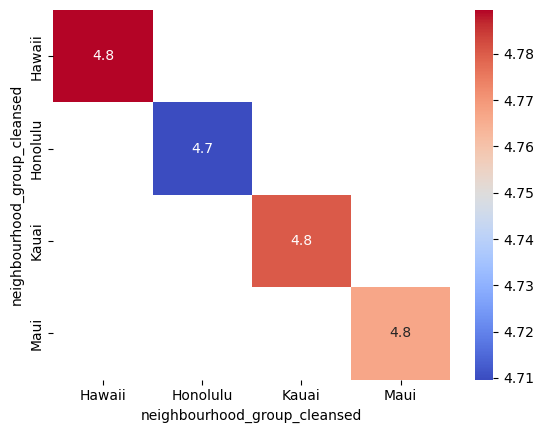

In [131]:
heatmap_data = pd.pivot_table(avg_review_score, values='review_scores_rating', index='neighbourhood_group_cleansed', columns='neighbourhood_group_cleansed')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')


The average review score for AirBNB's on each island is very similar.

In [132]:
grouped = df_no_nulls.groupby('room_type')['review_scores_rating'].mean().reset_index()
grouped

,room_type,review_scores_rating
0,Entire home/apt,4.759236
1,Hotel room,4.744110
2,Private room,4.746697
3,Shared room,4.715143


Text(0.5, 1.0, 'Average Review Score by Room Type')

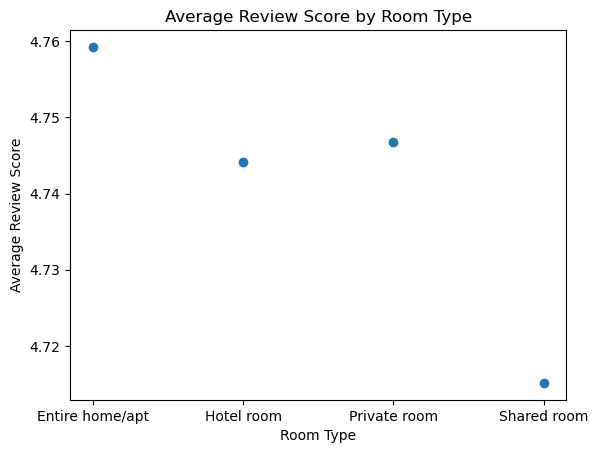

In [133]:
plt.scatter(grouped['room_type'], grouped['review_scores_rating'])
plt.xlabel('Room Type')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Room Type')

It can be drawn from this data that entire homes garner the highest review score, albeit only by four tenths. Shared rooms, as can be inferred, have the lowest, but still reflect a high average review score.

In [139]:
df_no_nulls['price'] = df_no_nulls['price'].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/lp/60n5pn7j3hl63d9fcz0qpskw0000gn/T/ipykernel_15090/3341799184.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_no_nulls['price'] = df_no_nulls['price'].str.replace('$', '').str.replace(',', '').astype(float)
/var/folders/lp/60n5pn7j3hl63d9fcz0qpskw0000gn/T/ipykernel_15090/3341799184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulls['price'] = df_no_nulls['price'].str.replace('$', '').str.replace(',', '').astype(float)


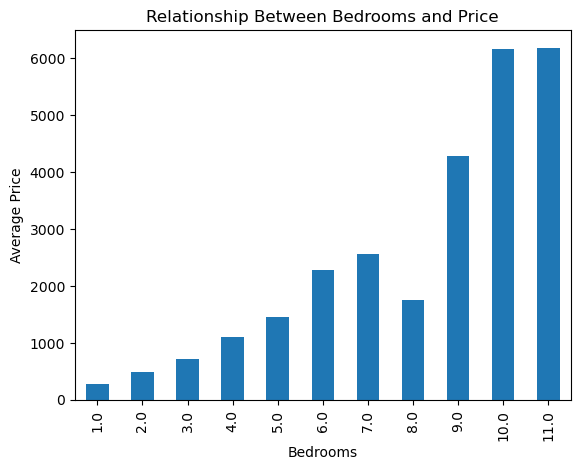

In [140]:
bedroom_price = df_no_nulls.groupby(['bedrooms'])['price'].mean()
bedroom_price.plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.title('Relationship Between Bedrooms and Price')
plt.show()

It can be drawn from this chart that there is a steady increase in price, as one would expect, from an increasing amount of bedrooms. It is interesting to note that a 8 bedroom rental property is where one would get significantly more value than a 10 bedroom place. It is also interesting to note that there is a significant price hike when going up to 9 bedrooms from 8 bedrooms, in more than **double** the price. 

For travellers in big groups, noting this difference could prove beneficial.

In [141]:
reviews_per_month_by_island = df1.groupby('neighbourhood_group_cleansed')['reviews_per_month'].mean()
reviews_per_month_by_island

neighbourhood_group_cleansed
Hawaii      1.471054
Honolulu    1.315552
Kauai       1.067210
Maui        1.089656
Name: reviews_per_month, dtype: float64

In [142]:
scores_by_island = df1.groupby('neighbourhood_group_cleansed')['review_scores_location'].mean()

scores_by_island

neighbourhood_group_cleansed
Hawaii      4.841693
Honolulu    4.856336
Kauai       4.884722
Maui        4.889114
Name: review_scores_location, dtype: float64

Now, what is the prettiest place to stay, according to location scores on Airbnb? Once again, the location review scores are very similar. These small differences could have an impact on a traveller looking for the most beautiful place possible, keeping in mind that the Hawaiin islands are all so beautiful. 

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='review_scores_location'>

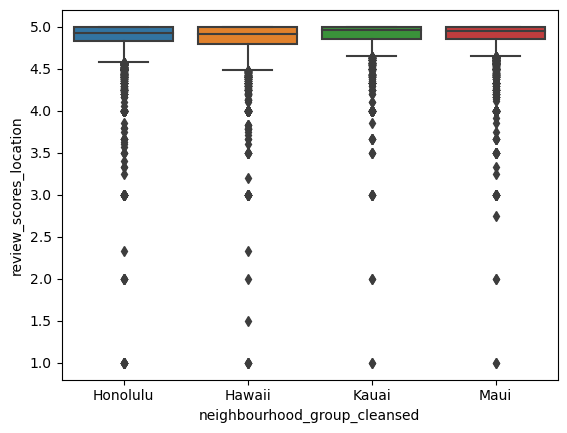

In [143]:
sns.boxplot(x="neighbourhood_group_cleansed", y="review_scores_location", data=df1)



It seems as though Kauai gets the most amount of high reviews. However, it would be good to know how many reviews there are per island to know it the data is skewed or not.

In [144]:
reviews_per_island = df1.groupby('neighbourhood_group_cleansed')['review_scores_location'].sum()
reviews_per_island

neighbourhood_group_cleansed
Hawaii      27031.17
Honolulu    32008.11
Kauai       17482.42
Maui        36595.02
Name: review_scores_location, dtype: float64

Wow! It Kauai ends up getting signficantly less location reviews than other islands, therefore maybe making it untrustworthy. Nonetheless, all the islands are beautiful and would make for a good trip. Travellers should consider heading to islands with the most reviews for the well known beauty of the land, or head to Kauai for some hidden gems that not many travellers may pick up on.